# Import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Get the data

In [3]:
data = pd.read_csv('Expander_data.csv')

In [4]:
data.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
0,1/4/2020 21:20,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448,NaN
1,1/4/2020 21:20,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636,NaN
2,1/4/2020 21:20,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324,NaN
3,1/4/2020 21:20,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113,NaN
4,1/4/2020 21:21,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296450 entries, 0 to 296449
Data columns (total 9 columns):
Timestamp                     296450 non-null object
Suction Pressure (psig)       296450 non-null float64
Suction Temperature (F)       296450 non-null float64
Total Flow (gpm)              296450 non-null float64
Speed (rpm)                   296450 non-null float64
By-pass Valve Position (%)    296450 non-null float64
Discharge Pressure (psig)     296450 non-null float64
Discharge Temperature (F)     296450 non-null float64
Run Status                    0 non-null float64
dtypes: float64(8), object(1)
memory usage: 20.4+ MB


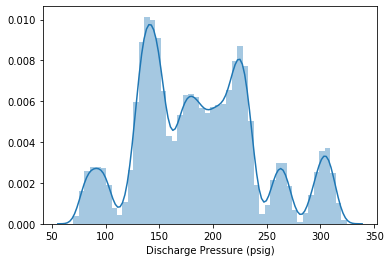

In [6]:
sns.distplot(data['Discharge Pressure (psig)'])

In [7]:
data.drop(['Timestamp','Run Status'],axis =1,inplace =True)

In [8]:
data.head()

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F)
0,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448
1,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636
2,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324
3,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113
4,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795


# Visulization of data

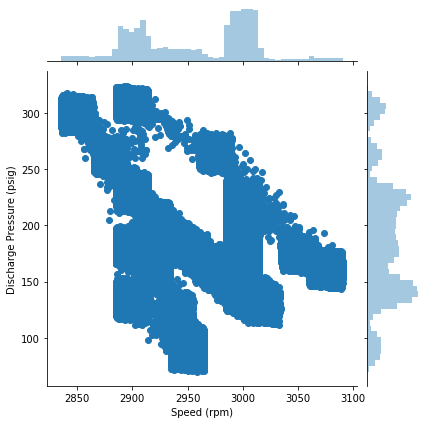

In [18]:
sns.jointplot(x='Speed (rpm)',y='Discharge Pressure (psig)',data=data)

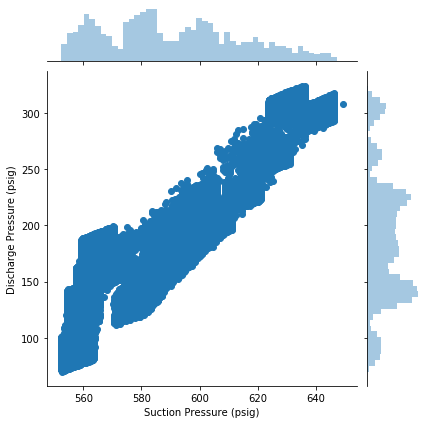

In [19]:
sns.jointplot(x='Suction Pressure (psig)',y='Discharge Pressure (psig)',data=data)

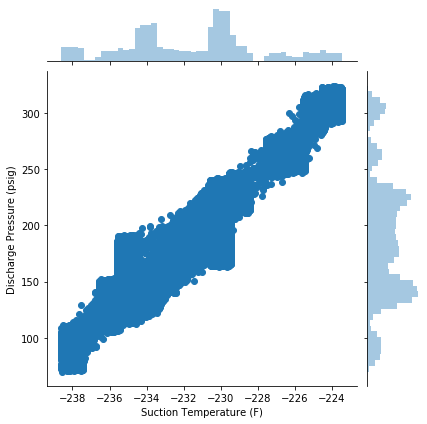

In [20]:
sns.jointplot(x='Suction Temperature (F)',y='Discharge Pressure (psig)',data=data)

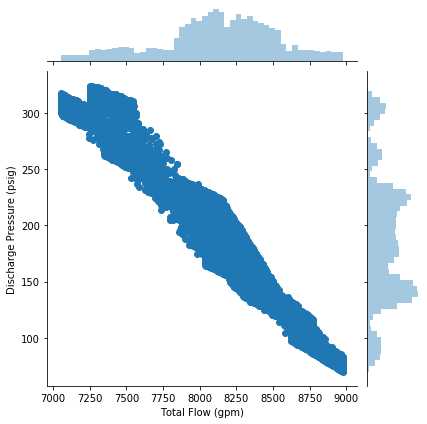

In [21]:
sns.jointplot(x='Total Flow (gpm)',y='Discharge Pressure (psig)',data=data)

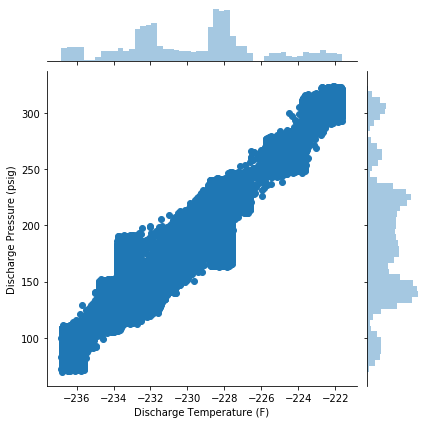

In [47]:
sns.jointplot(x='Discharge Temperature (F)',y='Discharge Pressure (psig)',data=data)

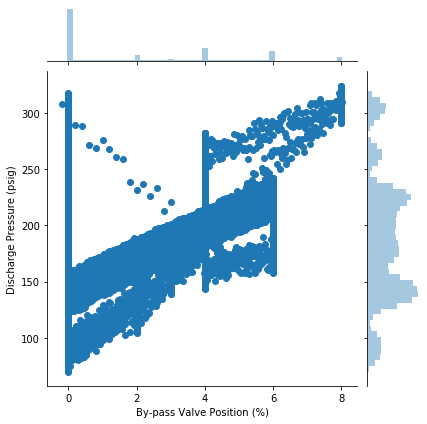

In [49]:
sns.jointplot(x='By-pass Valve Position (%)',y='Discharge Pressure (psig)',data=data)

# standardization of data

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()

In [24]:
df = sc.fit_transform(data)

In [29]:
type(df)

numpy.ndarray

In [31]:
#converting to dataframe
df1 = pd.DataFrame(data = df,index = data.index,columns = data.columns)

In [32]:
df1.head()

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F)
0,0.239463,0.595465,-0.487672,0.811683,1.605076,0.694845,0.601681
1,0.271224,0.310911,-0.085417,0.632639,1.605076,0.536604,0.306731
2,0.255316,0.565059,-0.547025,0.939367,1.605076,0.695008,0.562266
3,0.561106,0.351276,-0.321842,1.016040,1.605076,0.694334,0.356960
4,0.209593,0.502774,-0.623936,0.576532,1.605076,0.725527,0.501699


# Training and testing data

In [33]:
y = df1['Discharge Pressure (psig)']
x = df1.drop('Discharge Pressure (psig)',axis =1)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Training the model

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lm = LinearRegression()

In [39]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Model Evaluation
#Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [40]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 0.37429979  0.0654786  -0.49879591 -0.06211442  0.21962506 -0.00444688]


In [46]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Suction Pressure (psig),0.374300
Suction Temperature (F),0.065479
Total Flow (gpm),-0.498796
Speed (rpm),-0.062114
By-pass Valve Position (%),0.219625
Discharge Temperature (F),-0.004447


# Predicting test data

In [41]:
predictions = lm.predict(x_test)

# Evaluating the model

Text(0, 0.5, 'Predicted Y')

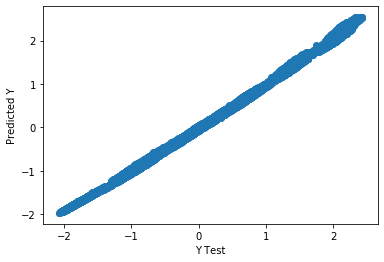

In [42]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [43]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.03353002492498946
MSE: 0.0019071147721767148
RMSE: 0.043670525210680884


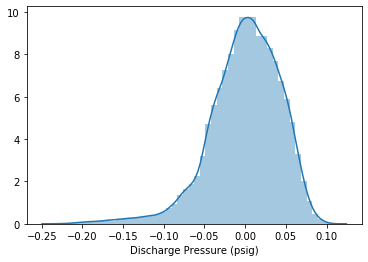

In [44]:
#Plot a histogram of the residuals and make sure it looks normally distributed
sns.distplot((y_test-predictions),bins=50);

# Save the model

In [50]:
import pickle

In [51]:
filename = 'lalit_mechademy_model2'

In [52]:
pickle.dump(lm, open(filename,'wb'))